In [ ]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [7]:
model_path = '/home/spankaew/Git/astrologics/models/dev/synthetic_random_diff/'
model = le.LogicEnsemble(model_path, project_name = 'synthetic_random_diff')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [8]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 1000/1000 [00:15<00:00, 65.68it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:00<00:00, 2156.04it/s]
/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


Attractors calculation completed


,bn_411,bn_361,bn_60,bn_109,bn_975,bn_265,bn_784,bn_595,bn_34,bn_624,bn_520,bn_980,bn_529,bn_461,bn_300,bn_985,bn_818,bn_707,bn_421,bn_631,bn_399,bn_152,bn_708,bn_380,bn_108,bn_393,bn_129,bn_314,bn_918,bn_54,bn_179,bn_722,bn_554,bn_213,bn_192,bn_958,bn_676,bn_503,bn_119,bn_521,bn_460,bn_117,bn_934,bn_391,bn_823,bn_872,bn_717,bn_576,bn_811,bn_833,bn_571,bn_454,bn_839,bn_339,bn_161,bn_405,bn_301,bn_928,bn_228,bn_894,bn_432,bn_667,bn_85,bn_476,bn_410,bn_120,bn_773,bn_887,bn_856,bn_158,bn_546,bn_323,bn_962,bn_51,bn_840,bn_542,bn_885,bn_330,bn_849,bn_502,bn_900,bn_892,bn_555,bn_217,bn_316,bn_653,bn_589,bn_701,bn_560,bn_553,bn_508,bn_758,bn_353,bn_212,bn_67,bn_527,bn_914,bn_336,bn_271,bn_154,bn_388,bn_829,bn_105,bn_853,bn_635,bn_869,bn_696,bn_704,bn_39,bn_563,bn_446,bn_311,bn_801,bn_543,bn_436,bn_258,bn_313,bn_779,bn_939,bn_990,bn_174,bn_480,bn_101,bn_198,bn_967,bn_90,bn_898,bn_11,bn_94,bn_587,bn_378,bn_92,bn_545,bn_444,bn_407,bn_294,bn_156,bn_598,bn_96,bn_870,bn_494,bn_769,bn_699,bn_329,bn_195,bn_987,bn_95,bn_425,bn_976,bn_71,bn_718,bn_64,bn_475,bn_977,bn_620,bn_348,bn_804,bn_387,bn_884,bn_498,bn_889,bn_836,bn_523,bn_70,bn_398,bn_512,bn_242,bn_905,bn_677,bn_260,bn_482,bn_72,bn_864,bn_785,bn_593,bn_91,bn_695,bn_578,bn_499,bn_15,bn_20,bn_935,bn_767,bn_202,bn_286,bn_999,bn_815,bn_150,bn_513,bn_139,bn_138,bn_910,bn_204,bn_906,bn_255,bn_383,bn_44,bn_516,bn_989,bn_413,bn_897,bn_173,bn_703,bn_564,bn_896,bn_462,bn_240,bn_440,bn_789,bn_912,bn_113,bn_754,bn_702,bn_723,bn_42,bn_488,bn_18,bn_297,bn_243,bn_235,bn_187,bn_949,bn_690,bn_496,bn_493,bn_270,bn_291,bn_537,bn_403,bn_658,bn_798,bn_55,bn_145,bn_75,bn_619,bn_511,bn_778,bn_289,bn_350,bn_908,bn_249,bn_807,bn_533,bn_77,bn_368,bn_178,bn_254,bn_645,bn_199,bn_434,bn_825,bn_647,bn_298,bn_716,bn_686,bn_850,bn_609,bn_875,bn_917,bn_762,bn_592,bn_966,bn_929,bn_276,bn_168,bn_56,bn_491,bn_17,bn_16,bn_206,bn_886,bn_167,bn_649,bn_295,bn_916,bn_408,bn_651,bn_278,bn_472,bn_787,bn_401,bn_666,bn_49,bn_115,bn_964,bn_923,bn_259,bn_562,bn_599,bn_681,bn_988,bn_515,bn_924,bn_183,bn_290,bn_430,bn_660,bn_991,bn_79,bn_650,bn_737,bn_616,bn_362,bn_893,bn_14,bn_123,bn_873,bn_782,bn_837,bn_524,bn_371,bn_585,bn_981,bn_519,bn_909,bn_816,bn_827,bn_490,bn_87,bn_147,bn_891,bn_466,bn_305,bn_463,bn_797,bn_874,bn_858,bn_776,bn_953,bn_832,bn_851,bn_257,bn_899,bn_372,bn_293,bn_89,bn_404,bn_209,bn_994,bn_93,bn_559,bn_625,bn_812,bn_306,bn_605,bn_780,bn_28,bn_810,bn_248,bn_501,bn_684,bn_859,bn_793,bn_878,bn_48,bn_691,bn_374,bn_665,bn_541,bn_441,bn_384,bn_867,bn_662,bn_518,bn_761,bn_103,bn_288,bn_951,bn_82,bn_792,bn_652,bn_304,bn_841,bn_694,bn_427,bn_360,bn_210,bn_31,bn_185,bn_419,bn_400,bn_526,bn_720,bn_913,bn_149,bn_965,bn_269,bn_345,bn_30,bn_414,bn_478,bn_963,bn_715,bn_303,bn_321,bn_245,bn_640,bn_760,bn_697,bn_791,bn_479,bn_740,bn_727,bn_756,bn_504,bn_46,bn_52,bn_663,bn_509,bn_191,bn_234,bn_730,bn_151,bn_141,bn_486,bn_819,bn_207,bn_328,bn_633,bn_842,bn_216,bn_721,bn_594,bn_218,bn_477,bn_569,bn_99,bn_517,bn_443,bn_471,bn_860,bn_926,bn_993,bn_189,bn_904,bn_230,bn_137,bn_495,bn_881,bn_689,bn_626,bn_600,bn_634,bn_772,bn_451,bn_638,bn_551,bn_148,bn_643,bn_417,bn_264,bn_470,bn_363,bn_98,bn_539,bn_719,bn_485,bn_712,bn_586,bn_157,bn_750,bn_835,bn_739,bn_222,bn_809,bn_568,bn_45,bn_386,bn_945,bn_733,bn_215,bn_130,bn_481,bn_601,bn_845,bn_219,bn_678,bn_655,bn_379,bn_159,bn_6,bn_950,bn_982,bn_820,bn_783,bn_692,bn_753,bn_646,bn_416,bn_606,bn_409,bn_252,bn_29,bn_68,bn_817,bn_996,bn_693,bn_890,bn_176,bn_69,bn_337,bn_352,bn_741,bn_356,bn_326,bn_429,bn_713,bn_675,bn_448,bn_590,bn_62,bn_377,bn_847,bn_274,bn_312,bn_59,bn_960,bn_334,bn_135,bn_630,bn_711,bn_752,bn_296,bn_940,bn_997,bn_986,bn_262,bn_32,bn_373,bn_522,bn_959,bn_153,bn_735,bn_724,bn_535,bn_610,bn_796,bn_931,bn_43,bn_757,bn_331,bn_668,bn_106,bn_50,bn_636,bn_794,bn_611,bn_865,bn_116,bn_131,bn_38,bn_602,bn_285,bn_671,bn_505,bn_710,bn_364,bn_381,bn_682,bn_13,bn_570,bn_322,bn_428,bn_84,bn_110,bn_220,bn_211,bn_229,bn_469,bn_648,bn_497,bn_318,bn_396,bn_193,bn_354,bn_114,bn_238,bn_705,bn_458,bn_7

This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


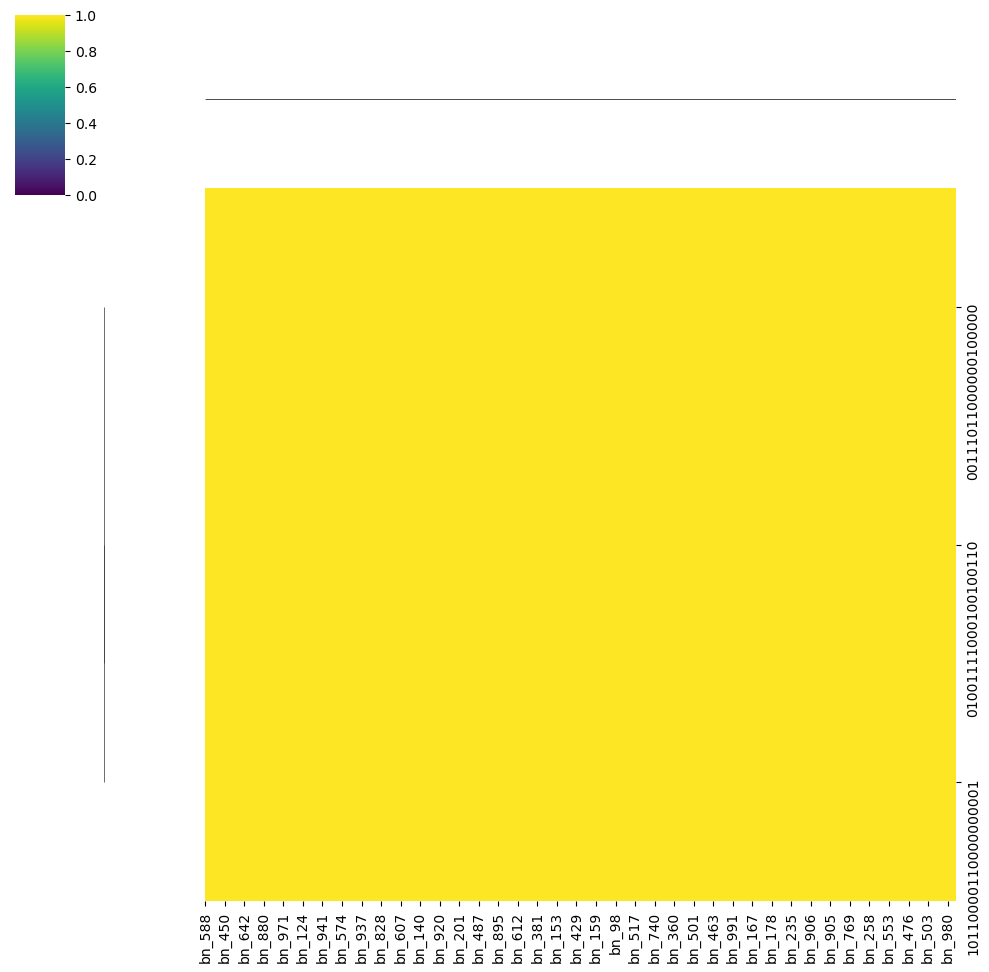

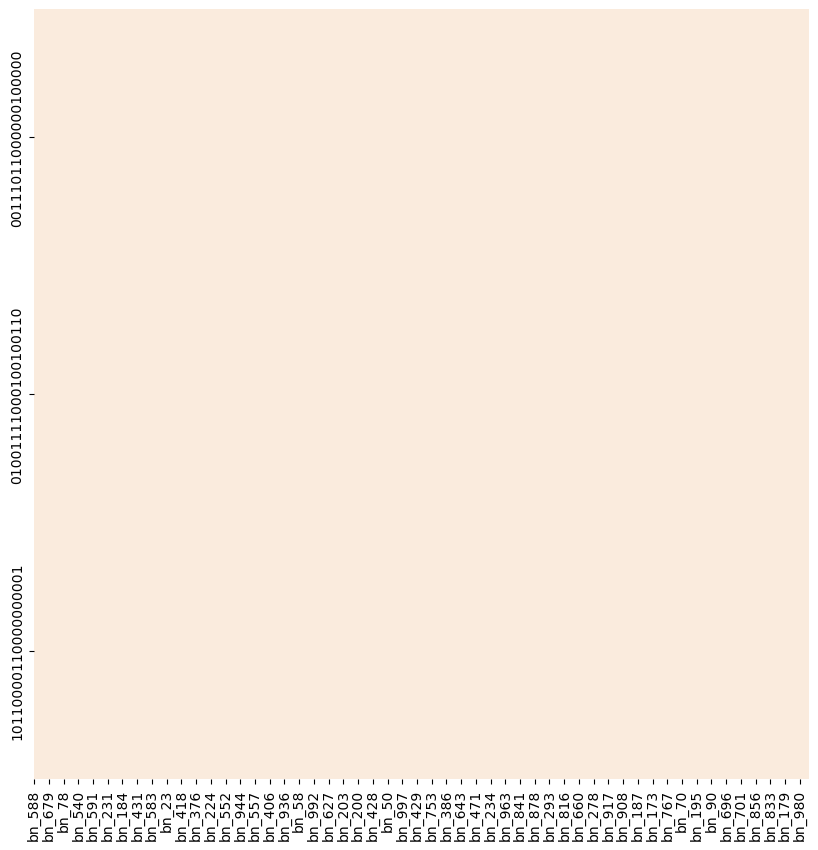

In [9]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, 
            #cmap='viridis', 
            vmax=1, vmin=0, cbar=False)
#plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_AttractorHeatmap.pdf')
plt.show()
plt.close()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [10]:
model.simulation.update_parameters(max_time = 10)
model.simulation.run_simulation()

Start simulation


100%|██████████| 1000/1000 [02:20<00:00,  7.11it/s]


Simulation completed


Trajectory object created


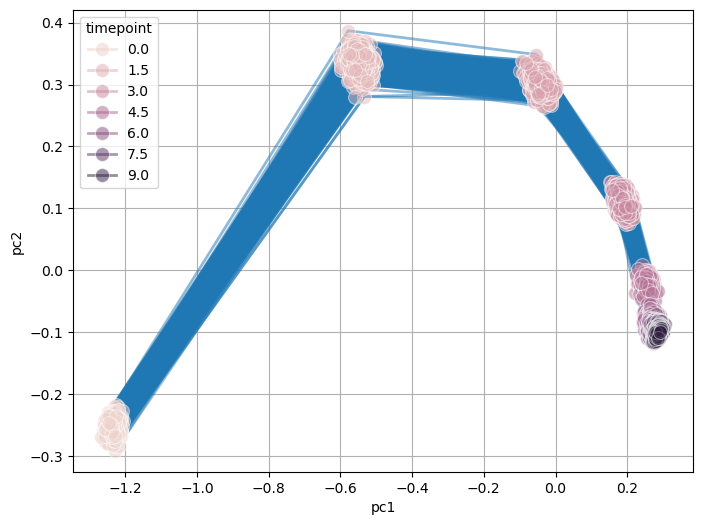

In [11]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [12]:
import numpy as np
# Setup the 
pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories

simulation_df = model.simulation.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = simulation_df.columns.drop(['timepoint','model_id'])

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

KeyboardInterrupt: 

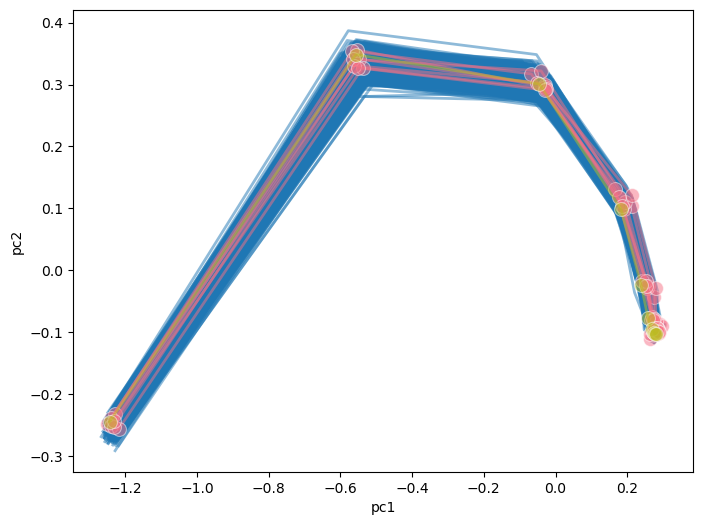

In [13]:
model.trajectory.plot_trajectory(color = 'model_id', show_legend=True)

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


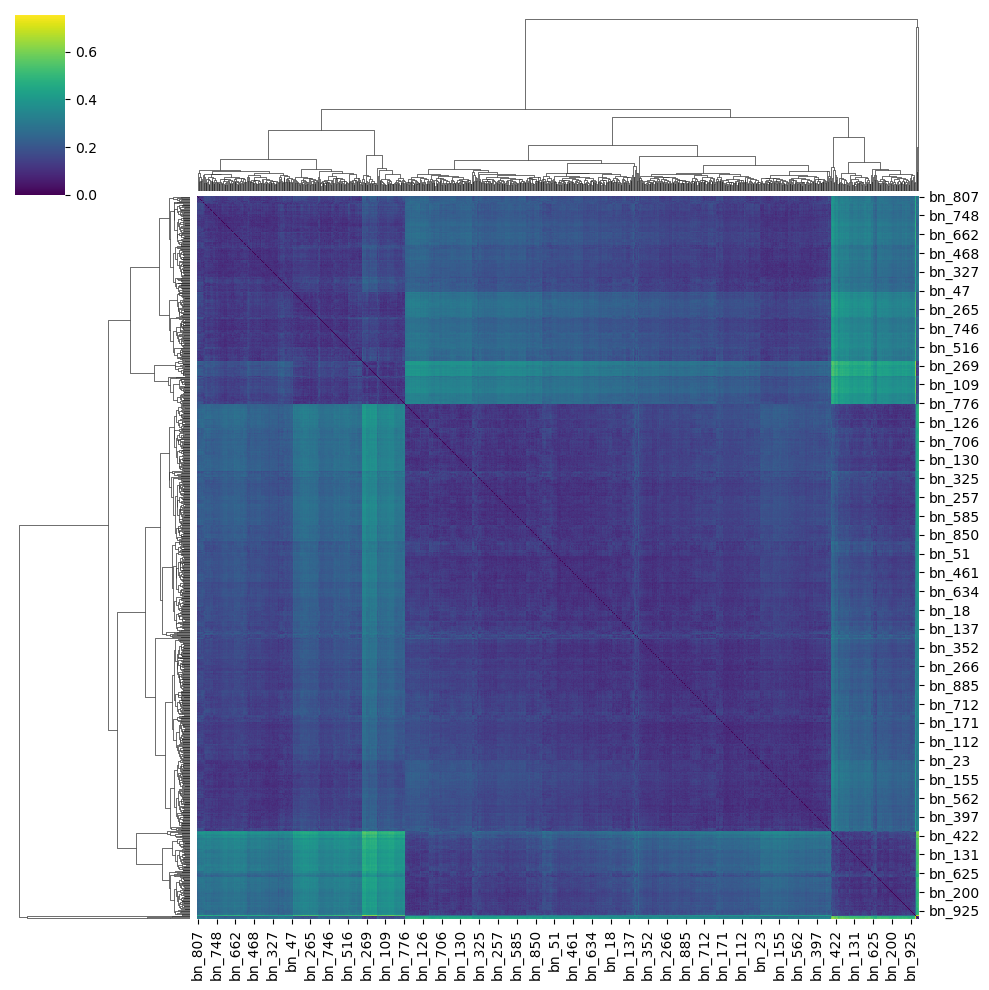

In [15]:
from tslearn.metrics import dtw

# Initialize an empty distance matrix
num_trajectories = len(pca_all_trajectory)
distance_matrix = np.zeros((num_trajectories, num_trajectories))

# Calculate DTW distance for each pair of trajectories
for i in range(num_trajectories):
    for j in range(num_trajectories):
        distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

# Display the distance matrix
distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)
sns.clustermap(distance_matrix, cmap='viridis', figsize=(10,10))

/tmp/ipykernel_31654/983908655.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


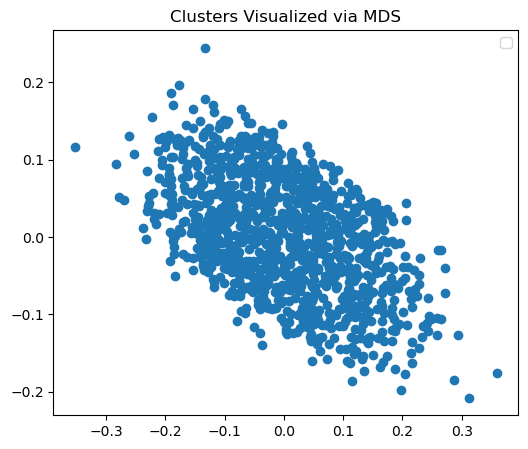

In [19]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1])
plt.legend()
plt.title('Clusters Visualized via MDS')
plt.show()

Succession diagram object created
Calculating Succession Diagrams


100%|██████████| 1000/1000 [04:08<00:00,  4.03it/s]


Succession Diagrams calculated


100%|██████████| 1000/1000 [00:05<00:00, 171.38it/s]


Creating SD networks


100%|██████████| 1000/1000 [00:04<00:00, 202.14it/s]


SD networks created


  0%|          | 0/1000 [00:00<?, ?it/s]/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
100%|██████████| 1000/1000 [16:06<00:00,  1.03it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


SD networks distance calculated


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


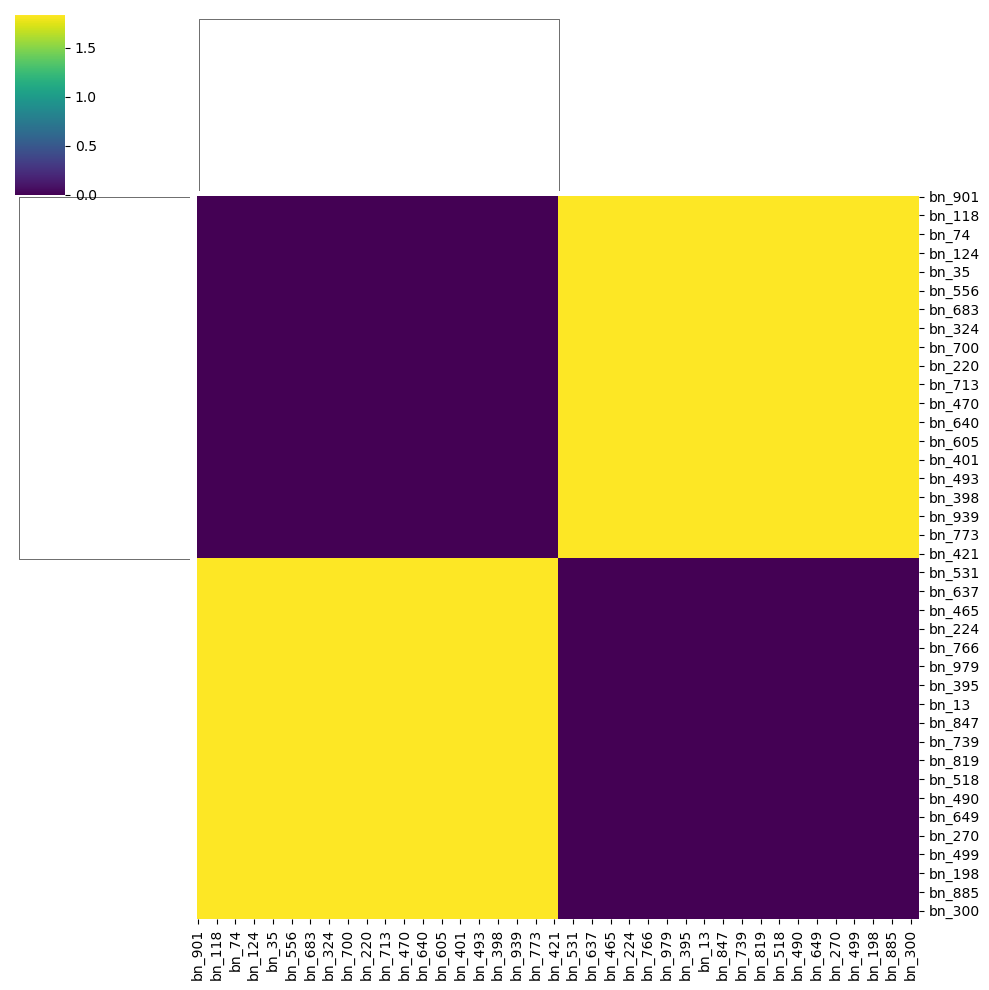

In [20]:
model.create_succession_diagram()
model.succession_diagram.calculate_succession_diagram()
model.succession_diagram.calculate_sd_states()
model.succession_diagram.create_sd_networks()
model.succession_diagram.calculate_sdnet_distance()
sns.clustermap(model.succession_diagram.distance_matrix, cmap='viridis')

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


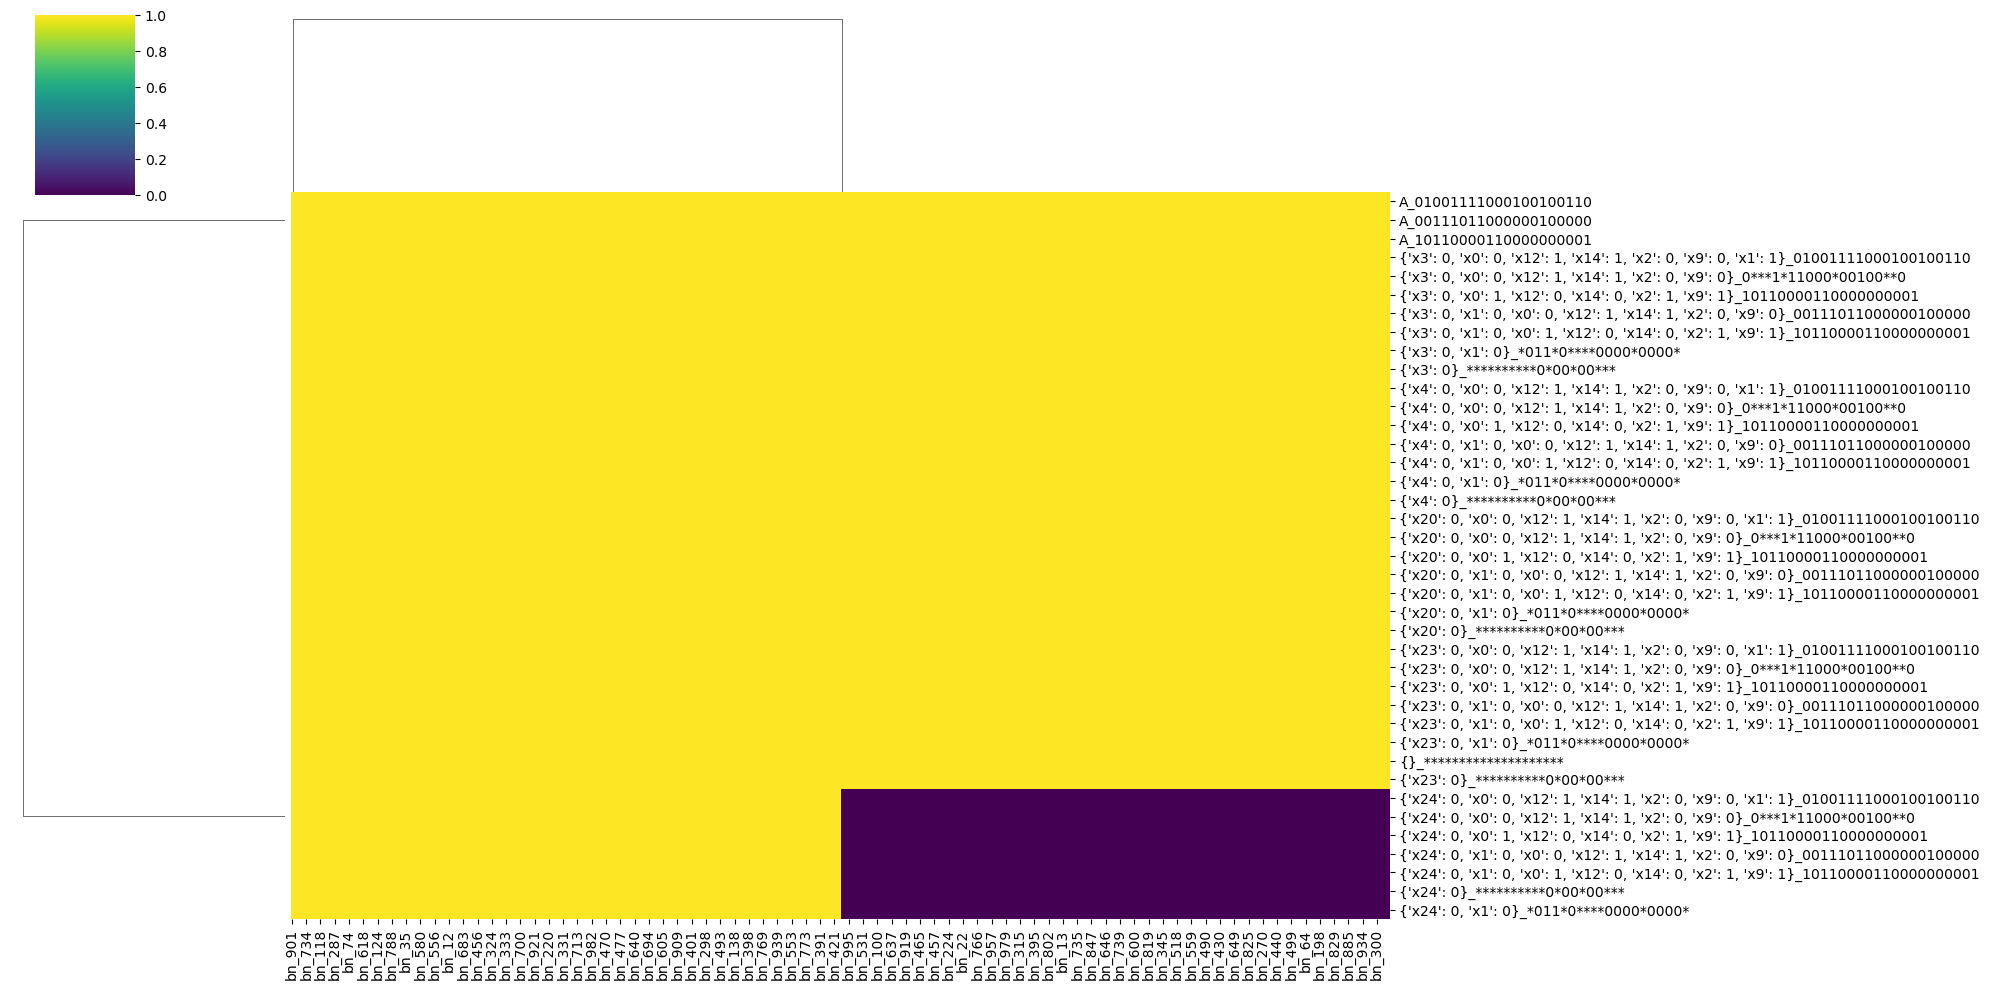

In [ ]:
sns.clustermap(model.succession_diagram.states_bin, figsize=(20,10), cmap='viridis')

/tmp/ipykernel_31654/479990510.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


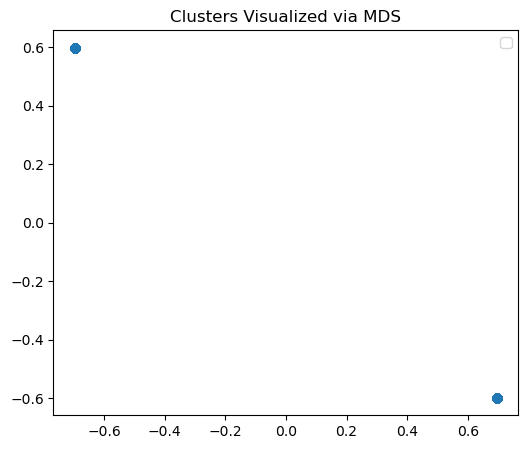

In [21]:
# Visualize clusters with MDS
distance_matrix_2 = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix_2)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1])
plt.legend()
plt.title('Clusters Visualized via MDS')
plt.show()

In [23]:
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape ,dtype = bool), k=1)).stack().reset_index()
distances_1['combined'] = distances_1['level_0'] + "_" + distances_1['level_1']
distances_1.set_index('combined', inplace=True)
distances_1.drop(columns=['level_0', 'level_1'], inplace=True)
distances_1.columns = ['traj_distance']

In [24]:
distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape ,dtype = bool), k=1)).stack().reset_index()
distances_2['combined'] = distances_2['level_0'] + "_" + distances_2['level_1']
distances_2.set_index('combined', inplace=True)
distances_2.drop(columns=['level_0', 'level_1'], inplace=True)
distances_2.columns = ['sd_distance']

Correlation between the two distance matrices: 0.0019898626050284304
P-value: 0.15962333143046728


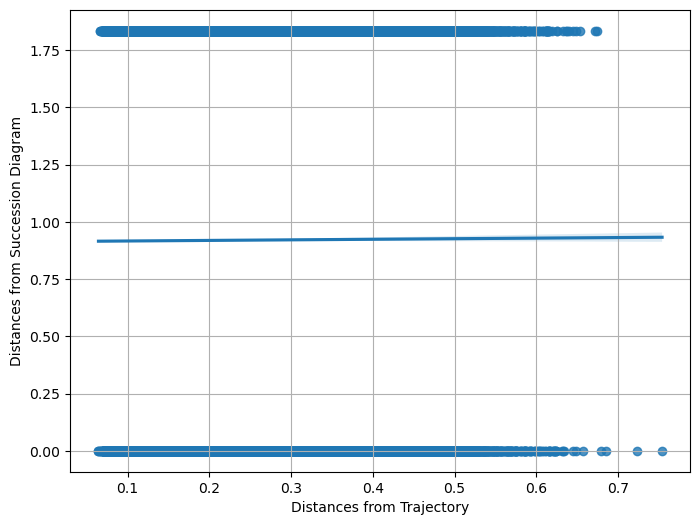

In [25]:
from scipy.stats import pearsonr

# Extract the upper triangular parts of the distance matrices (excluding the diagonal)
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape, dtype = 'bool'), k=1)).stack()

distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape, dtype = 'bool'), k=1)).stack()

# Compute the correlation and p-value
correlation, p_value = pearsonr(distances_1.values, distances_2.values)

# Print the correlation and p-value
print(f"Correlation between the two distance matrices: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.regplot(x=distances_1.values, y=distances_2.values)
plt.xlabel("Distances from Trajectory")
plt.ylabel("Distances from Succession Diagram")
plt.grid(True)
plt.show()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [8]:
model.create_logic()
model.logic.model_logic

Loading models logics


100%|██████████| 8/8 [00:00<00:00, 156.33it/s]


Concatenate results into matrix


100%|██████████| 8/8 [00:00<00:00, 1238.31it/s]

Logic object created


,bn3,bn4,bn7,bn5,bn0,bn2,bn6,bn1
G1,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G2,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G3,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G4,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G5,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G6,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G7,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
G8,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
G9,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
TF1,(!TF2) | (TF3),(!TF2 & TF3),(!TF2) | (TF3),(!TF2) | (TF3),(!TF2 & TF3),(!TF2 & TF3),(!TF2) | (TF3),(!TF2 & TF3)


Flatten models logic clauses


100%|██████████| 8/8 [00:00<00:00, 96420.78it/s]


Concatenate results into matrix


100%|██████████| 8/8 [00:00<00:00, 1146.65it/s]


Flattend logic clause created


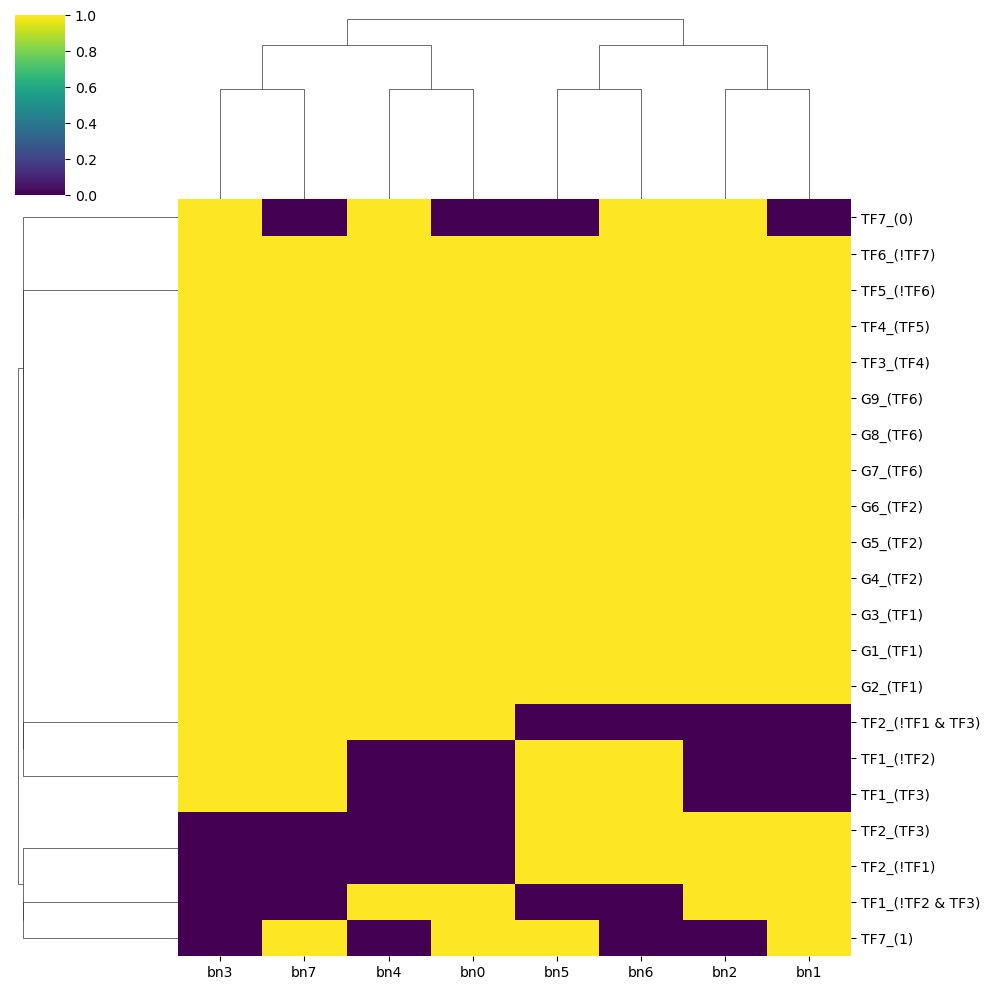

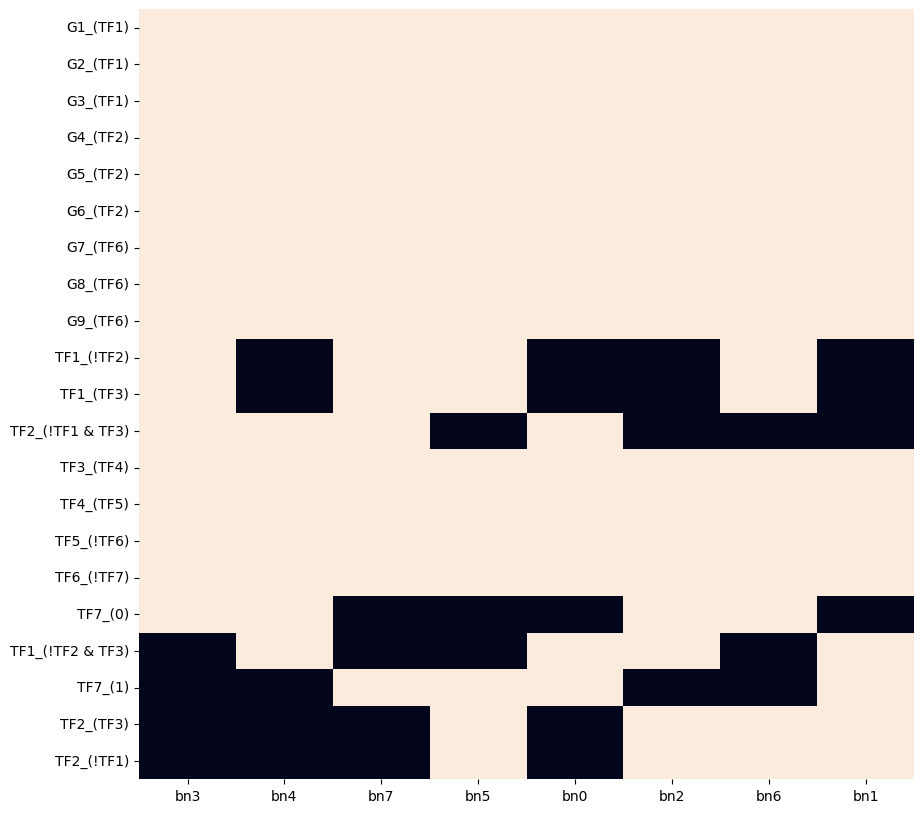

In [13]:
model.logic.create_flattend_logic_clause()
# Create the clustermap
clustermap = sns.clustermap(model.logic.logic_clause_flattend, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.logic.logic_clause_flattend.iloc[row_order, col_order]
# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(model.logic.logic_clause_flattend, vmax=1, vmin=0, cbar=False)
plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_Logic.pdf')
plt.show()
plt.close()

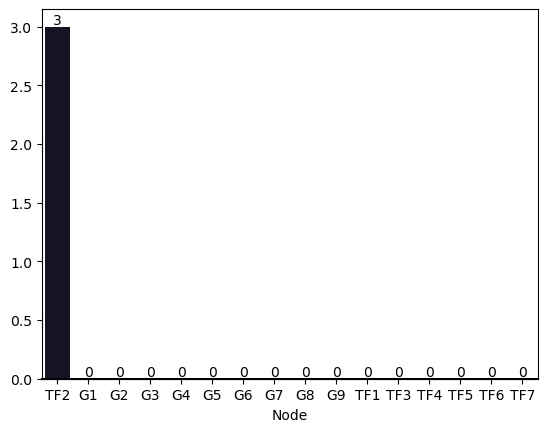

In [14]:
test = model.logic.logic_clause_flattend.copy()
test_dif = test['bn0'] - test['bn1']

# Split the index into two parts
split_index = test_dif.index.str.split('_', expand=True)
split_df = split_index.to_frame(index=False)
split_df['value'] = test_dif.values

# Pivot the DataFrame to create the matrix
matrix = split_df.pivot(index=0, columns= 1, values='value')

# Display the matrix
plot_value = matrix.abs().sum(axis = 1).sort_values(ascending = False)


plot = sns.barplot(x=plot_value.index, y=plot_value.values, palette="rocket")
plot.axhline(0, color="k", clip_on=False)
plot.set_xlabel("Node")
plot.bar_label(plot.containers[0], fontsize=10)
plt.show()

NameError: name 'var_logic_clust' is not defined

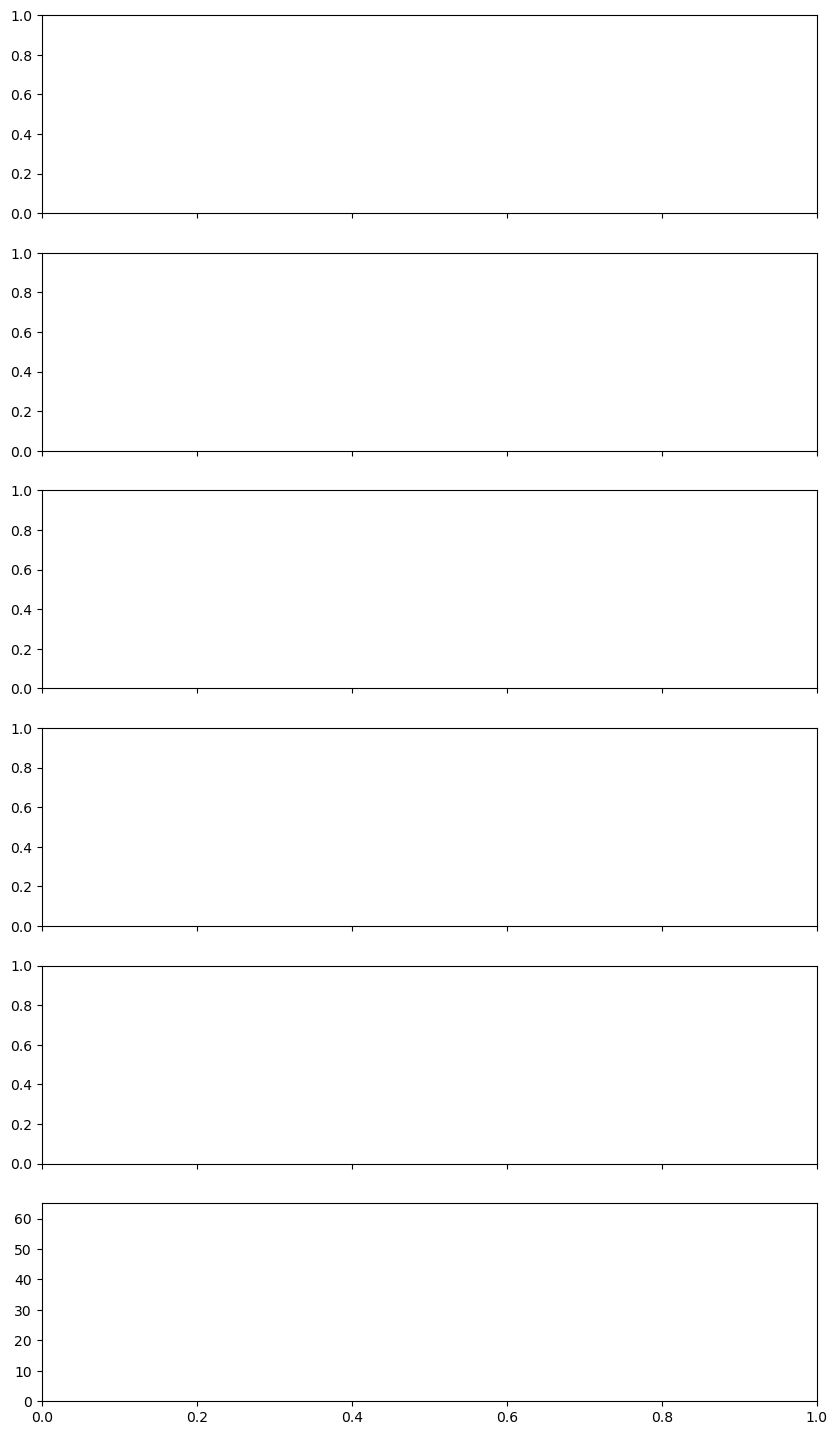

In [15]:
fig, axes = plt.subplots(6, 1, figsize=(10, 18), sharex=True)
plt.ylim(0, 65)

for i in range(6):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], palette="rocket", ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 95)

plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.preprocessing import OrdinalEncoder

model_logic = model.logic.model_logic
model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

# 
sort_index = encoded_df.max().sort_values().index